In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import TypeVar
import os
from tools.ramanflow.read_data import ReadData as RD
from tools.ramanflow.prep_data import PrepData as PD 
from scipy.signal import savgol_filter

In [2]:
f_sup_0810, Carbendazim_0810 = RD.read_dir_tiff_files('data/20210810 SERS timed immersion experiment/1') 

ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra dimension 'I'
ImageJ series: detected extra di

In [3]:
car_files = [k for k in os.listdir() if 'car_clipped_' in k]
aceta_files = [k for k in os.listdir() if 'aceta_clipped_' in k]
car_aceta_aceph_files = [k for k in os.listdir() if 'car_aceta_aceph_clipped_' in k]

In [4]:
for index, file in enumerate(car_files):
    df = pd.read_csv(file, header=None)
    globals()["car_clipped_" + str(index + 1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)

In [5]:
for index, file in enumerate(aceta_files):
    df = pd.read_csv(file, header=None)
    globals()["aceta_clipped_" + str(index + 1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)

In [6]:
for index, file in enumerate(car_aceta_aceph_files):
    df = pd.read_csv(file, header=None)
    globals()["car_aceta_aceph_clipped_" + str(index + 1)] = df.iloc[1:, 0:1410].to_numpy(dtype=np.float64, copy=True)

### Smooth the data

In [9]:
car_clipped_1_smooth = np.zeros_like(car_clipped_1)
car_clipped_2_smooth = np.zeros_like(car_clipped_2)
car_clipped_3_smooth = np.zeros_like(car_clipped_3)
car_clipped_4_smooth = np.zeros_like(car_clipped_4)
car_clipped_5_smooth = np.zeros_like(car_clipped_5)
for i in range(car_clipped_1.shape[0]):
     car_clipped_1_smooth[i] = savgol_filter(car_clipped_1[i], window_length=5, polyorder=3)
     car_clipped_2_smooth[i] = savgol_filter(car_clipped_2[i], window_length=5, polyorder=3)
     car_clipped_3_smooth[i] = savgol_filter(car_clipped_3[i], window_length=5, polyorder=3)
     car_clipped_4_smooth[i] = savgol_filter(car_clipped_4[i], window_length=5, polyorder=3)
     car_clipped_5_smooth[i] = savgol_filter(car_clipped_5[i], window_length=5, polyorder=3)

In [17]:
aceta_clipped_1_smooth = np.zeros_like(aceta_clipped_1)
aceta_clipped_2_smooth = np.zeros_like(aceta_clipped_2)
aceta_clipped_3_smooth = np.zeros_like(aceta_clipped_3)
aceta_clipped_4_smooth = np.zeros_like(aceta_clipped_4)
aceta_clipped_5_smooth = np.zeros_like(aceta_clipped_5)
for i in range(car_clipped_1.shape[0]):
     aceta_clipped_1_smooth[i] = savgol_filter(aceta_clipped_1[i], window_length=11, polyorder=3)
     aceta_clipped_2_smooth[i] = savgol_filter(aceta_clipped_2[i], window_length=11, polyorder=3)
     aceta_clipped_3_smooth[i] = savgol_filter(aceta_clipped_3[i], window_length=11, polyorder=3)
     aceta_clipped_4_smooth[i] = savgol_filter(aceta_clipped_4[i], window_length=11, polyorder=3)
     aceta_clipped_5_smooth[i] = savgol_filter(aceta_clipped_5[i], window_length=11, polyorder=3)

In [26]:
car_aceta_aceph_clipped_1_smooth = np.zeros_like(car_aceta_aceph_clipped_1)
car_aceta_aceph_clipped_2_smooth = np.zeros_like(car_aceta_aceph_clipped_2)
car_aceta_aceph_clipped_3_smooth = np.zeros_like(car_aceta_aceph_clipped_3)
car_aceta_aceph_clipped_4_smooth = np.zeros_like(car_aceta_aceph_clipped_4)
car_aceta_aceph_clipped_5_smooth = np.zeros_like(car_aceta_aceph_clipped_5)
for i in range(car_clipped_1.shape[0]):
     car_aceta_aceph_clipped_1_smooth[i] = savgol_filter(car_aceta_aceph_clipped_1[i], window_length=5, polyorder=3)
     car_aceta_aceph_clipped_2_smooth[i] = savgol_filter(car_aceta_aceph_clipped_2[i], window_length=5, polyorder=3)
     car_aceta_aceph_clipped_3_smooth[i] = savgol_filter(car_aceta_aceph_clipped_3[i], window_length=5, polyorder=3)
     car_aceta_aceph_clipped_4_smooth[i] = savgol_filter(car_aceta_aceph_clipped_4[i], window_length=5, polyorder=3)
     car_aceta_aceph_clipped_5_smooth[i] = savgol_filter(car_aceta_aceph_clipped_5[i], window_length=5, polyorder=3)

### Combine all of the data together for NMF

In [ ]:
car_combined = np.zeros()

In [ ]:
[k for k in globals().keys() if 'car_clipped_' in k]

In [ ]:
def find_line_equation(point_1: tuple, point_2: tuple):
    points = [point_1, point_2]
    x_coords, y_coords = zip(*points)
    A = np.vstack([x_coords, np.ones(len(x_coords))]).T
    m, b = np.linalg.lstsq(A, y_coords)[0]
    return m, b
#     print("Line Solution is y = {m}x + {b}".format(m=m,b=b))

In [12]:
import plotly.graph_objects as go

In [27]:
z = car_aceta_aceph_clipped_1_smooth
x = f_sup_0810[190:]
# y = [5, 30, 60, 180, 300, 1440, 4320, 11520]
y = [1, 2, 3, 4, 5, 6, 7, 8, 9]

In [28]:
data = go.Surface(z=z, x=x, y=y)#, scene=scene)
fig = go.Figure(data=data)#, scene=scene)

In [29]:
fig = go.Figure(data=data)#, layout=layout)

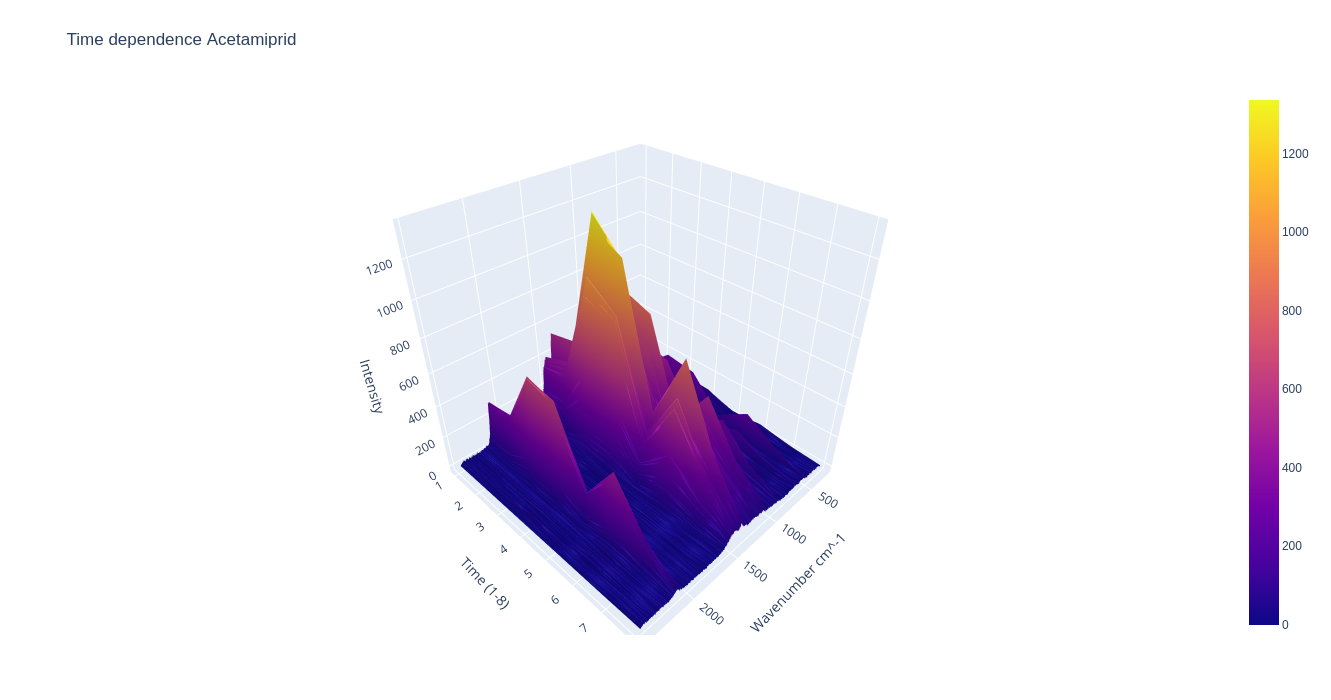

In [30]:
fig.update_layout(title='Time dependence Acetamiprid', autosize=False,
                  width=1200, height=700,
                  margin=dict(l=65, r=50, b=65, t=90),scene=dict(
                  xaxis_title='Wavenumber cm^-1',
                  yaxis_title='Time (1-8)',
                  zaxis_title='Intensity'))
fig.update_yaxes(type="log")

In [81]:
fig.write_html("/home/anvarkunanbayev/PycharmProjects/Raman/aceta_1.html")